# Lecture 04

**Date:** Jan 18, 2024

## Learning objectives

What you should be able to do after today's lecture.

1.  🐍 Understand the basics of NumPy arrays and their role in data manipulation.
2.  🐍 Understand the role of pandas DataFrames in data analysis and manipulation.
3.  🐍 Explain and employ the key components of a matplotlib Figure.

## Readings

Relevant material for today's lecture.

-   [Working with data](../../../modules/intro/data/)
-   [Plotting](../../../modules/intro/plotting/)

Today, we will have a guided lecture about exploring a data set on protein contact maps and molecular properties.

In [1]:
import sys

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !pip install rdkit-pypi
    !pip install py3dmol

In [2]:
# Here, we import our standard libraries to use in Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Contact maps

You have probably seen cartoon depictions of proteins like this one of the Green Fluorescent Protein (GFP).

<script src="https://cdnjs.cloudflare.com/ajax/libs/3Dmol/2.0.6/3Dmol.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.1.1/jquery.min.js"></script>

<div id="rogfp2-cartoon-view" class="mol-container"></div>
<script>
var uri = 'https://files.rcsb.org/view/1JC0.pdb';
jQuery.ajax( uri, {
    success: function(data) {
        // https://3dmol.org/doc/GLViewer.html
        let viewer = $3Dmol.createViewer(
            document.querySelector('#rogfp2-cartoon-view'),
            { backgroundAlpha: '0.0' }
        );
        viewer.addModel( data, 'pdb' );
        viewer.setStyle({chain: 'A'}, {cartoon: {color: 'spectrum'}});
        viewer.setStyle({chain: 'B'}, {});
        viewer.setStyle({chain: 'C'}, {});
        viewer.setStyle({chain: 'A', resn: 'CRO'}, {stick: {}});  
        viewer.zoomTo({chain: 'A'});
        viewer.render();
    },
    error: function(hdr, status, err) {
        console.error( "Failed to load " + uri + ": " + err );
    },
});
</script>

This is a very intuitive representation of the GFP structure.


We can see the $\beta$ strands and the chromophore in the center.
However, that is just one intuitive representation; a more physically accurate representation is the atomistic structure shown below.

<div id="rogfp2-view" class="mol-container"></div>
<script>
var uri = 'https://files.rcsb.org/view/1JC0.pdb';
jQuery.ajax( uri, {
    success: function(data) {
        // https://3dmol.org/doc/GLViewer.html
        let viewer = $3Dmol.createViewer(
            document.querySelector('#rogfp2-view'),
            { backgroundAlpha: '0.0' }
        );
        viewer.addModel( data, 'pdb' );
        viewer.setStyle({chain: 'A'}, {stick: {}});
        viewer.setStyle({chain: 'B'}, {});
        viewer.setStyle({chain: 'C'}, {});
        viewer.setStyle({chain: 'A', resn: 'CRO'}, {stick: {}});  
        viewer.zoomTo({chain: 'A'});
        viewer.render();
    },
    error: function(hdr, status, err) {
        console.error( "Failed to load " + uri + ": " + err );
    },
});
</script>

Wow, that is a lot harder to interpret, and the same goes for trying to quantitatively describe this structure without over complicating things.
The sheer complexity of this molecular architecture makes it challenging to grasp the structural nuances and relationships at a glance.

To overcome this complexity, researchers often simplify their representation by focusing on specific key elements, such as $\alpha$ carbons.
This simplification is crucial for making the analysis tractable and insightful.
By selectively highlighting essential features, like $\alpha$ carbons, researchers can create contact maps that distill the intricate details of inter-atomic interactions into a comprehensible array.

<div id="rogfp2-alphac-view" class="mol-container"></div>
<script>
var uri = 'https://files.rcsb.org/view/1JC0.pdb';
jQuery.ajax( uri, {
    success: function(data) {
        // https://3dmol.org/doc/GLViewer.html
        let viewer = $3Dmol.createViewer(
            document.querySelector('#rogfp2-alphac-view'),
            { backgroundAlpha: '0.0' }
        );
        viewer.addModel( data, 'pdb' );
        viewer.setStyle({chain: 'A'}, {stick: {opacity: 0.7}});
        viewer.setStyle({chain: 'B'}, {});
        viewer.setStyle({chain: 'C'}, {});
        viewer.setStyle({chain: 'A', atom: 'CA'}, {sphere: {radius: 0.5, color: "purple"}});  
        viewer.zoomTo({chain: 'A'});
        viewer.render();
    },
    error: function(hdr, status, err) {
        console.error( "Failed to load " + uri + ": " + err );
    },
});
</script>

This simplified view not only aids in visualization but also allows for the identification of spatial patterns and functional domains within the protein.
In essence, simplifying the representation is a strategic approach to distilling the wealth of structural information in proteins, enabling researchers to extract meaningful insights without becoming overwhelmed by the intricacies of individual atoms.

Since proteins can get very large, we will use a synthetic dataset to thoughtfully probe.
Below is the standard code we will use in this course to load NumPy arrays from the [GitLab repository](https://gitlab.com/oasci/courses/pitt/biosc1540-2024s).

Here is what is going on.


In [3]:
import io
from urllib import request

NPY_PATH = "https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/npy/protein-contact-maps.npy"

response = request.urlopen(NPY_PATH)
content = response.read()

# Load the .npy file
contact_maps = np.load(io.BytesIO(content))

1.  **Retrieving the .npy File from the URL:**
    The URL specified in NPY_PATH points to a .npy file containing protein contact maps. The code uses urlopen from the urllib library to open the URL and obtain a response object. The read() method is then called on this response to retrieve the binary content of the file.
2.  **Creating a Binary Stream:**
    To load the binary content into a NumPy array, the code utilizes io.BytesIO. This class allows the binary content obtained from the URL to be treated as a binary stream.
    This step is crucial because NumPy's np.load expects a file-like object, and io.BytesIO provides a convenient way to convert binary content into such an object.
3.  **Loading the .npy File Using NumPy:**
    The heart of the code lies in the np.load(io.BytesIO(content)) line. Here, NumPy's load function is employed to read and interpret the binary content as a NumPy array.
    The io.BytesIO object serves as an interface between the binary content and NumPy, allowing seamless loading of the data directly from the web.
4.  **Result:**
    The final result is a NumPy array named contact_maps, which contains the protein contact maps from the remote .npy file.
    This approach is efficient for situations where the data is hosted online, as it avoids the need to manually download the file and then load it into the Python environment.

In [4]:
print(contact_maps.shape)

(500, 16, 16)


In [5]:
print(contact_maps[0])

[[ 0.          3.83347011  6.93431997  9.98147011 12.15553474 10.16739845
   9.63760185 13.3811655  14.22265434 12.16785812 11.25229836 13.22015572
  14.96301937 17.38097    19.78103447 22.77887917]
 [ 3.83347011  0.          3.8165617   6.73455429  8.41300297  6.38442278
   6.43562698 10.01253414 10.86362839  9.45881081  9.09638691 11.9043169
  13.0393858  15.49612617 18.04162598 21.29822922]
 [ 6.93431997  3.8165617   0.          3.76643252  5.74598122  5.59764814
   6.23895741  8.78576565 10.59183884 10.48924541 10.03008556 13.47540855
  14.49065304 17.1993618  19.9050312  23.19474792]
 [ 9.98147011  6.73455429  3.76643252  0.          3.8503058   5.13913107
   4.87924004  5.94701481  8.74501419  9.5961504   8.79932785 12.51224041
  13.42786694 16.42795753 19.28792381 22.37532425]
 [12.15553474  8.41300297  5.74598122  3.8503058   0.          3.77418947
   5.90038109  5.66926956  7.38994122  9.34163666 10.01371002 13.80911827
  13.64373016 15.98110294 18.59047318 21.94004059]
 [10.1

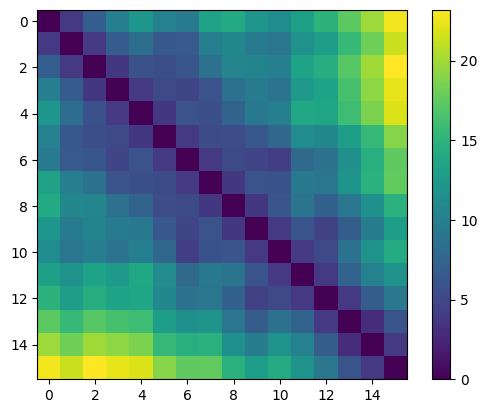

In [6]:
index = 0
plt.imshow(contact_maps[index], cmap="viridis", interpolation="nearest")
plt.colorbar()

plt.show()

In [7]:
aa_values = contact_maps[:, 0]
print(aa_values)
print(aa_values.shape)

[[ 0.          3.83347011  6.93431997 ... 17.38097    19.78103447
  22.77887917]
 [ 0.          3.81670856  6.60578823 ... 20.97814941 19.54075432
  16.61600304]
 [ 0.          3.80369949  7.25624418 ... 23.25949669 23.68174362
  26.26152611]
 ...
 [ 0.          3.84979677  6.23215246 ... 12.16074181 13.03322315
  15.69995117]
 [ 0.          3.87816453  5.80189323 ... 15.25770855 14.67540646
  18.14950562]
 [ 0.          3.90148878  5.80140972 ... 20.25053787 21.37346077
  22.67399979]]
(500, 16)


In [8]:
aa_0_mean = np.mean(aa_values, axis=1)
print(aa_0_mean)

[11.99111439 11.97024673 15.17017302  8.57789998 11.98437238 11.28796546
 11.04551125 12.96451695 13.04674888  9.33696827  9.73044434 16.1866824
 21.38740641 11.53940398 12.05457219 11.62484162 10.17643495 11.88070583
 13.65726094 11.99471892 16.83260553 10.85588773 19.32457812 10.6284204
 14.23978885 11.90934056 12.85869028 19.63310583 10.96395595 16.28667821
 11.63892934 10.4522976  13.1936086  11.27021123 10.39140265 10.62757346
  9.29321992 10.87964851 17.13238373 17.33406818 19.59616062 18.46880299
 19.91673662  9.56926294 16.85157    18.39389022 20.28002788 18.64135811
 14.78038821 16.37198833 13.82168923 17.00406849 17.12714995 13.17792772
 16.98283355 16.42749873 11.54413424 15.05712384 20.31567428 16.47410102
 17.46657319 14.77779043 10.48447445 13.83417466 17.18588948 12.73746775
 12.20609529 12.05412054 12.01460744 11.29121611 11.70313466 11.61252895
 13.64778627 11.26277857 11.75401624 12.11137974 13.26923315 11.44849372
 13.13520652 12.02761523 10.04821604 12.44371416 11.3

## Molecular properties

In [9]:
CSV_PATH = "https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/csv/mol-biodegrade-props.csv"

df_all = pd.read_csv(CSV_PATH)

print(df_all.head())

      CAS-RN             Smiles Class  SpMax_L  J_Dz(e)  nHM  F01[N-N]  \
0  1120-21-4        CCCCCCCCCCC    RB    3.919   2.6909    0         0   
1   106-88-7            CCC1CO1    RB    4.170   2.1144    0         0   
2   112-50-5       CCOCCOCCOCCO    RB    3.932   3.2512    0         0   
3    64-18-6               OC=O    RB    3.000   2.7098    0         0   
4   124-17-4  CCCCOCCOCCOC(C)=O    RB    4.236   3.3944    0         0   

   F04[C-N]  NssssC  nCb-  ...  nCrt  C-026  F02[C-N]  nHDon  SpMax_B(m)  \
0         0       0     0  ...     0      0         0      0       2.949   
1         0       0     0  ...     0      0         0      0       3.315   
2         0       0     0  ...     0      0         0      1       3.076   
3         0       0     0  ...     0      0         0      1       3.046   
4         0       0     0  ...     0      0         0      0       3.351   

   Psi_i_A  nN  SM6_B(m)  nArCOOR  nX  
0    1.591   0     7.253        0   0  
1    1.967   0    

## Get acquainted

I define a function called `show_mol` in a hidden cell that allows you to display a 3D molecule from it's `"Smiles"` string using [rdkit](https://www.rdkit.org/) and [py3Dmol](https://3dmol.org/).

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import py3Dmol


def show_mol(smi, style="stick"):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=500, height=500)
    view.addModel(mblock, "mol")
    view.setStyle({style: {}})
    view.zoomTo()
    view.show()

In [11]:
df_index = 62  # Change me to some int from 0 to 1054
_ = df_all.iloc[df_index]
show_mol(_["Smiles"])
print(_)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

CAS-RN              91-16-7
Smiles         COc1ccccc1OC
Class                    RB
SpMax_L               4.828
J_Dz(e)              3.3386
nHM                       0
F01[N-N]                  0
F04[C-N]                  0
NssssC                    0
nCb-                      2
C%                     40.0
nCp                       0
nO                        2
F03[C-N]                  0
SdssC                   0.0
HyWi_B(m)             3.203
LOC                   1.261
SM6_L                 9.749
F03[C-O]                  4
Me                    1.004
Mi                    1.125
nN-N                      0
nArNO2                    0
nCRX3                     0
SpPosA_B(p)           1.219
nCIR                      1
B01[C-Br]                 0
B03[C-Cl]                 0
N-073                     0
SpMax_A               2.247
Psi_i_1d              0.014
B04[C-Br]                 0
SdO                     0.0
TI2_L                 1.436
nCrt                      0
C-026               

We have a ton of information about each molecule.

For completeness, here are the column descriptions.
You do not need to know what any of these mean; we are just using this for some realistic data.

<details><summary>Open to view data definitions</summary>

| Column | Description |
| ------ | ----------- |
| B01[C-Br] | presence/absence of C–Br at topological distance 1 |
| B03[C-Cl] | presence/absence of C–Cl at topological distance 3 |
| B04[C-Br] | presence/absence of C–Br at topological distance 4 |
| C% | percentage of C atoms |
| C-026 | R–CX–R |
| F01[N-N] | frequency of N–N at topological distance 1 |
| F02[C-N] | frequency of C–N at topological distance 2 |
| F03[C-N] | frequency of C–N at topological distance 3 |
| F03[C-O] | frequency of C–O at topological distance 3 |
| F04[C-N] | frequency of C–N at topological distance 4 |
| HyWi_B(m) | hyper-Wiener-like index (log function) from Burden matrix weighted by mass |
| J_Dz(e) | Balaban-like index from Barysz matrix weighted by Sanderson electronegativity |
| LOC | lopping centric index |
| Me | mean atomic Sanderson electronegativity (scaled on Carbon atom) |
| Mi | mean first ionization potential (scaled on carbon atom) |
| N-073 | Ar2NH/Ar3N/Ar2N–Al/R···N···R |
| nArCOOR | number of esters (aromatic) |
| nArNO2 | number of nitro groups (aromatic) |
| nCb- | number of substituted benzene C(sp2) |
| nCIR | number of circuits |
| nCp | number of terminal primary C(sp3) |
| nCrt | number of ring tertiary C(sp3) |
| nCRX3 | number of CRX3 |
| nHDon | number of donor atoms for H-bonds (N and O) |
| nHM | number of heavy atoms |
| nN | number of nitrogen atoms |
| nN-N | number of N hydrazines |
| nO | number of oxygen atoms |
| NssssC | number of atoms of type ssssC |
| nX | number of halogen atoms |
| Psi_i_1d | intrinsic state pseudoconnectivity index–type 1d |
| Psi_i_A | intrinsic state pseudoconnectivity index—type S average |
| SdO | sum of dO E-states |
| SdssC | sum of dssC E-states |
| SM6_B(m) | spectral moment of order 6 from Burden matrix weighted by mass |
| SM6_L | spectral moment of order 6 from Laplace matrix |
| SpMax_A | leading eigenvalue from adjacency matrix (Lovasz–Pelikan index) |
| SpMax_B(m) | leading eigenvalue from Burden matrix weighted by mass |
| SpMax_L | leading eigenvalue from Laplace matrix |
| SpPosA_B(p) | normalized spectral positive sum from Burden matrix weighted by polarizability |
| TI2_L | second Mohar index from Laplace matrix |
</details>

Let's take a look at our DataFrame.

In [12]:
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CAS-RN       1055 non-null   object 
 1   Smiles       1055 non-null   object 
 2   Class        1055 non-null   object 
 3   SpMax_L      1055 non-null   float64
 4   J_Dz(e)      1055 non-null   float64
 5   nHM          1055 non-null   int64  
 6   F01[N-N]     1055 non-null   int64  
 7   F04[C-N]     1055 non-null   int64  
 8   NssssC       1055 non-null   int64  
 9   nCb-         1055 non-null   int64  
 10  C%           1055 non-null   float64
 11  nCp          1055 non-null   int64  
 12  nO           1055 non-null   int64  
 13  F03[C-N]     1055 non-null   int64  
 14  SdssC        1055 non-null   float64
 15  HyWi_B(m)    1055 non-null   float64
 16  LOC          1055 non-null   float64
 17  SM6_L        1055 non-null   float64
 18  F03[C-O]     1055 non-null   int64  
 19  Me    

In [13]:
print(df_all.shape)

(1055, 44)


We have 1055 molecules and 44 columns.

However, lots of this information is not really too useful to us data explorers, so we can remove this information.
We do this by dropping a column from the table.

In [14]:
df = df_all.drop(labels=["CAS-RN", "Smiles"], axis=1)
print(df.head())

  Class  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-    C%  nCp  \
0    RB    3.919   2.6909    0         0         0       0     0  31.4    2   
1    RB    4.170   2.1144    0         0         0       0     0  30.8    1   
2    RB    3.932   3.2512    0         0         0       0     0  26.7    2   
3    RB    3.000   2.7098    0         0         0       0     0  20.0    0   
4    RB    4.236   3.3944    0         0         0       0     0  29.4    2   

   ...  nCrt  C-026  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  SM6_B(m)  \
0  ...     0      0         0      0       2.949    1.591   0     7.253   
1  ...     0      0         0      0       3.315    1.967   0     7.257   
2  ...     0      0         0      1       3.076    2.417   0     7.601   
3  ...     0      0         0      1       3.046    5.000   0     6.690   
4  ...     0      0         0      0       3.351    2.405   0     8.003   

   nArCOOR  nX  
0        0   0  
1        0   0  
2        0   0  
3     

Okay, so we have `Class` column where values of `"RB"` and `"NRB"` which means "Ready Biodegradability" and "Not Ready Biodegradability".
I wonder how many we have of each?

Let's first get just the column to work with.

In [15]:
mol_class = df["Class"]
print(mol_class)

0        RB
1        RB
2        RB
3        RB
4        RB
       ... 
1050    NRB
1051    NRB
1052    NRB
1053    NRB
1054    NRB
Name: Class, Length: 1055, dtype: object


In [16]:
mol_class.value_counts()

Class
NRB    699
RB     356
Name: count, dtype: int64

In [17]:
df.rename(columns={"Class": "Biodegradable"}, inplace=True)
print(df.head())

  Biodegradable  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-  \
0            RB    3.919   2.6909    0         0         0       0     0   
1            RB    4.170   2.1144    0         0         0       0     0   
2            RB    3.932   3.2512    0         0         0       0     0   
3            RB    3.000   2.7098    0         0         0       0     0   
4            RB    4.236   3.3944    0         0         0       0     0   

     C%  nCp  ...  nCrt  C-026  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  \
0  31.4    2  ...     0      0         0      0       2.949    1.591   0   
1  30.8    1  ...     0      0         0      0       3.315    1.967   0   
2  26.7    2  ...     0      0         0      1       3.076    2.417   0   
3  20.0    0  ...     0      0         0      1       3.046    5.000   0   
4  29.4    2  ...     0      0         0      0       3.351    2.405   0   

   SM6_B(m)  nArCOOR  nX  
0     7.253        0   0  
1     7.257        0   0  
2    

In [18]:
df["Biodegradable"] = df["Biodegradable"].replace(
    {"RB": True, "NRB": False}, inplace=False
)
print(df.head())

   Biodegradable  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-  \
0           True    3.919   2.6909    0         0         0       0     0   
1           True    4.170   2.1144    0         0         0       0     0   
2           True    3.932   3.2512    0         0         0       0     0   
3           True    3.000   2.7098    0         0         0       0     0   
4           True    4.236   3.3944    0         0         0       0     0   

     C%  nCp  ...  nCrt  C-026  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  \
0  31.4    2  ...     0      0         0      0       2.949    1.591   0   
1  30.8    1  ...     0      0         0      0       3.315    1.967   0   
2  26.7    2  ...     0      0         0      1       3.076    2.417   0   
3  20.0    0  ...     0      0         0      1       3.046    5.000   0   
4  29.4    2  ...     0      0         0      0       3.351    2.405   0   

   SM6_B(m)  nArCOOR  nX  
0     7.253        0   0  
1     7.257        0   0  

Great, now let's try to explore our data some more.
One of our columns is `nCb-`, which is the number of substituted benzene C(sp2).
From chemical intuition, this should be pretty impactful for the biodegradation potential.

In [19]:
ncb_data = df["nCb-"].to_numpy()
print(ncb_data)

[0 0 0 ... 5 9 4]


In [20]:
print(np.mean(ncb_data))

1.6464454976303318


In [21]:
print(np.std(ncb_data))

2.223767387554041


In [22]:
print(np.max(ncb_data))

18


Let's find an example where the molecule **is not biodegradable**.

In [23]:
df_benzene_nrb = df[(df["Biodegradable"] == False) & (df["nCb-"] > 0)]
print(df_benzene_nrb)

      Biodegradable  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-  \
284           False    4.825   3.1934    3         0         0       0     3   
289           False    5.236   3.9153    6         0         0       0     6   
290           False    5.522   3.7026    0         0         0       3     4   
293           False    5.798   1.9414    1         0         0       0     4   
294           False    5.451   2.8245    0         1         9       2     6   
...             ...      ...      ...  ...       ...       ...     ...   ...   
1048          False    5.265   3.3444    2         0         6       0     1   
1049          False    5.029   2.5966    0         0         0       0     4   
1052          False    4.869   1.7670    0         1         9       0     5   
1053          False    5.158   1.6914    2         0        36       0     9   
1054          False    5.076   2.6588    2         0         0       0     4   

        C%  nCp  ...  nCrt  C-026  F02[

In [24]:
idx_max_nrb = df_benzene_nrb["nCb-"].idxmax()
_ = df_all.iloc[idx_max_nrb]
show_mol(_["Smiles"])

row_with_max_value = df.iloc[idx_max_nrb]
print(row_with_max_value)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Biodegradable     False
SpMax_L           5.493
J_Dz(e)           2.107
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                6
nCb-                 18
C%                 40.0
nCp                  21
nO                    3
F03[C-N]              0
SdssC               0.0
HyWi_B(m)         4.889
LOC                0.97
SM6_L            12.308
F03[C-O]             12
Me                0.974
Mi                1.125
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)       1.283
nCIR                  4
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A           2.525
Psi_i_1d            0.0
B04[C-Br]             0
SdO                 0.0
TI2_L             3.898
nCrt                  0
C-026                 3
F02[C-N]              0
nHDon                 3
SpMax_B(m)        3.956
Psi_i_A             2.0
nN                    0
SM6_B(m)          9.962
nArCOOR               0
nX              

What about one that **is biodegradable**?

In [25]:
df_benzene_rb = df[(df["Biodegradable"] == True) & (df["nCb-"] > 0)]
idx_max_rb = df_benzene_rb["nCb-"].idxmax()
_ = df_all.iloc[idx_max_rb]
show_mol(_["Smiles"])

row_with_max_value = df.iloc[idx_max_rb]
print(row_with_max_value)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Biodegradable     True
SpMax_L           4.97
J_Dz(e)          3.567
nHM                  3
F01[N-N]             0
F04[C-N]             0
NssssC               0
nCb-                 4
C%                46.2
nCp                  0
nO                   1
F03[C-N]             0
SdssC              0.0
HyWi_B(m)         3.66
LOC              0.861
SM6_L            10.06
F03[C-O]             2
Me               1.073
Mi               1.099
nN-N                 0
nArNO2               0
nCRX3                0
SpPosA_B(p)      1.334
nCIR                 1
B01[C-Br]            0
B03[C-Cl]            1
N-073                0
SpMax_A          2.307
Psi_i_1d         0.015
B04[C-Br]            0
SdO                0.0
TI2_L            0.962
nCrt                 0
C-026                4
F02[C-N]             0
nHDon                1
SpMax_B(m)       4.106
Psi_i_A            2.9
nN                   0
SM6_B(m)         9.154
nArCOOR              0
nX                   3
Name: 152, dtype: object


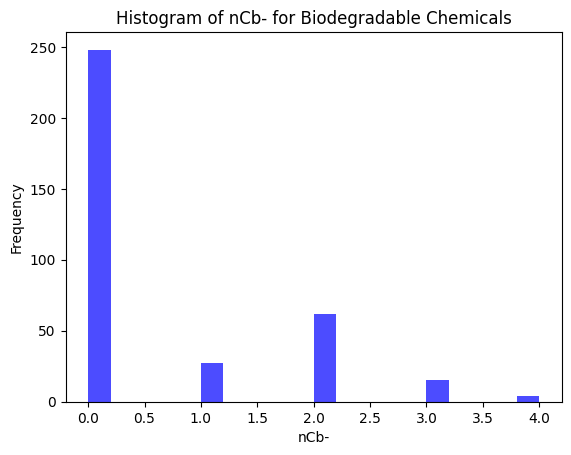

In [27]:
# Histogram for Biodegradable Chemicals
fig, ax1 = plt.subplots()
ax1.hist(
    df["nCb-"][df["Biodegradable"] == True],
    bins=20,
    alpha=0.7,
    color="blue",
    align="mid",
)
ax1.set_title("Histogram of nCb- for Biodegradable Chemicals")
ax1.set_xlabel("nCb-")
ax1.set_ylabel("Frequency")

plt.show()

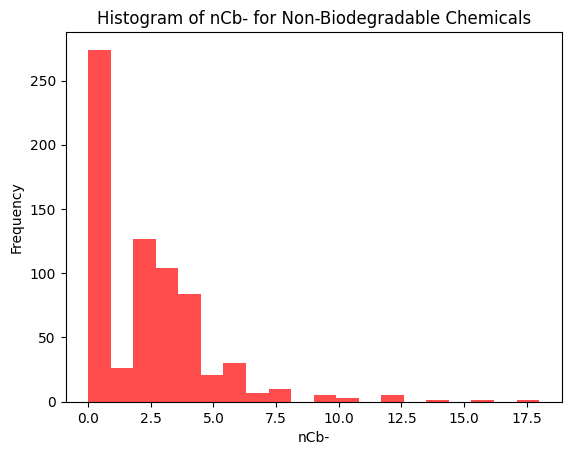

In [28]:
# Histogram for Non-Biodegradable Chemicals
fig, ax = plt.subplots()
ax.hist(df["nCb-"][df["Biodegradable"] == False], bins=20, alpha=0.7, color="red")
ax.set_title("Histogram of nCb- for Non-Biodegradable Chemicals")
ax.set_xlabel("nCb-")
ax.set_ylabel("Frequency")

plt.show()

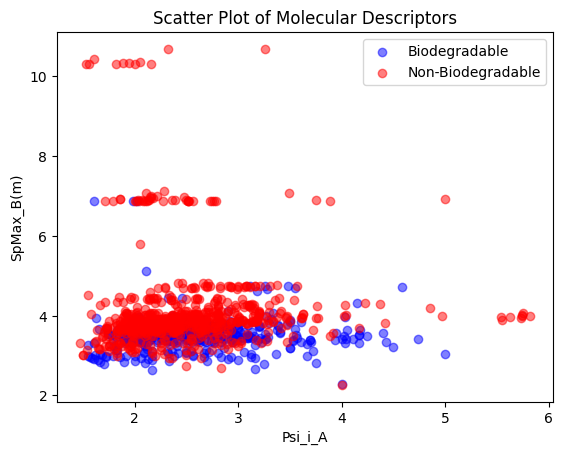

In [29]:
# Scatter Plot of Molecular Descriptors
label_1 = "Psi_i_A"
label_2 = "SpMax_B(m)"
plt.scatter(
    df[df["Biodegradable"] == True][label_1],
    df[df["Biodegradable"] == True][label_2],
    label="Biodegradable",
    color="blue",
    alpha=0.5,
)
plt.scatter(
    df[df["Biodegradable"] == False][label_1],
    df[df["Biodegradable"] == False][label_2],
    label="Non-Biodegradable",
    color="red",
    alpha=0.5,
)

plt.title("Scatter Plot of Molecular Descriptors")
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.legend()  # Show legend to distinguish between Biodegradable and Non-Biodegradable points
plt.show()

## Acknowledgements

This CSV file was taken from [this paper](https://pubs.acs.org/doi/10.1021/ci4000213).